# Import libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [3]:
# load the data
raw_df=pd.read_csv("datasets/train.csv")
raw_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
raw_df.shape

(1460, 81)

# Data Cleansing  

In [6]:
# check missing values
missing=pd.DataFrame(raw_df.isnull().sum())
missing_values=missing[missing[0]!=0]
missing_values

,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [7]:
# we can see the percentages of missing values of 
# Alley,FireplaceQu ,PoolQC, Fence, and MiscFeature are more than 40% 
# So  I will simply remove those columns
df=raw_df.drop(columns=["Alley","FireplaceQu",'PoolQC', 'Fence','MiscFeature']).dropna(axis=0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Feature Engineering

In [8]:
new_df=df.copy()

In [9]:
num_col=['LotFrontage','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','LotArea','YearBuilt','YearRemodAdd','MasVnrArea',
        '1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea',
        'GarageYrBlt','GarageArea','WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
        'PoolArea', 'MiscVal']

In [10]:
# to find all columns that contain "str" values
cat_col=['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
           'TotRmsAbvGrd','Fireplaces','GarageCars', 'MoSold', 'YrSold','MSSubClass', 'OverallQual', 'OverallCond']
for i in range(len(new_df.columns)):
    if type(new_df[new_df.columns[i]][0])==str:
        cat_col.append(new_df.columns[i])

In [11]:
# Encode the catogorical data
from sklearn import  preprocessing
# create a function to transform the data 
def encode(data):
    le = preprocessing.LabelEncoder()
    le.fit(data)
    return le.transform(data)

In [12]:
# apply the function above
for i in new_df[cat_col].columns:
    new_df[i]= encode(new_df[cat_col][i])

In [13]:
new_df.shape,raw_df.shape # double check the size and shape

((1094, 76), (1460, 81))

# Distribution

In [14]:
len(num_col),len(cat_col)

(22, 52)

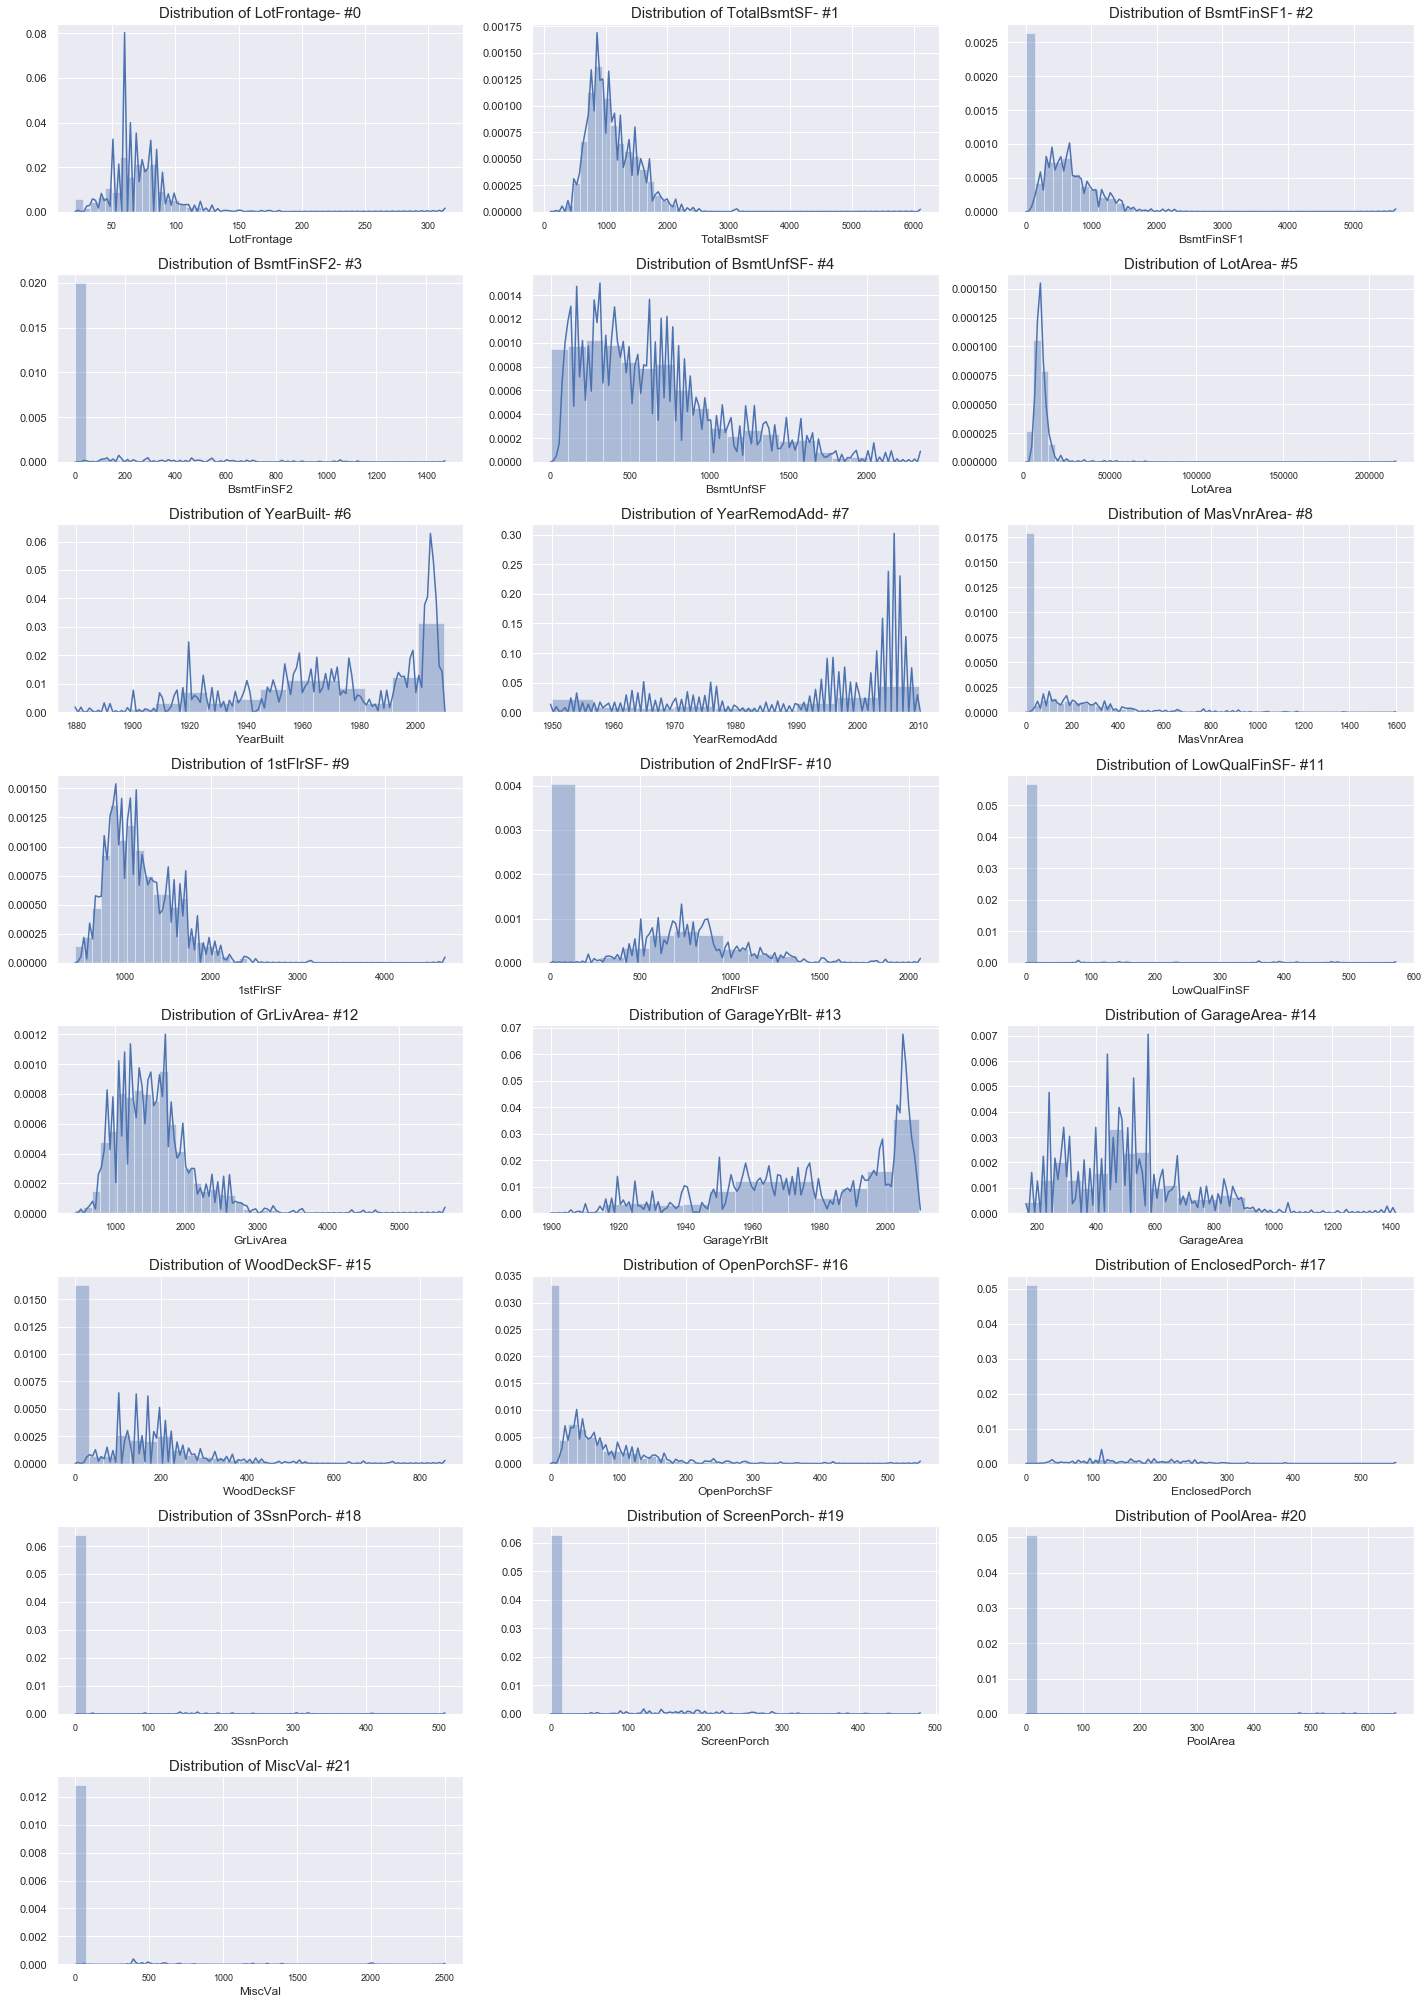

In [15]:
# numerical variabels distributions
plt.figure(figsize=(20,28))
for i in range(0,len(num_col)):
    plt.subplot(8,3,i+1)
    sns.distplot(new_df[num_col[i]],kde_kws={'bw': 0.1})
    plt.title("Distribution of {}- #{}".format(num_col[i],i),fontsize=15)
    plt.xticks(size=9)
plt.tight_layout()

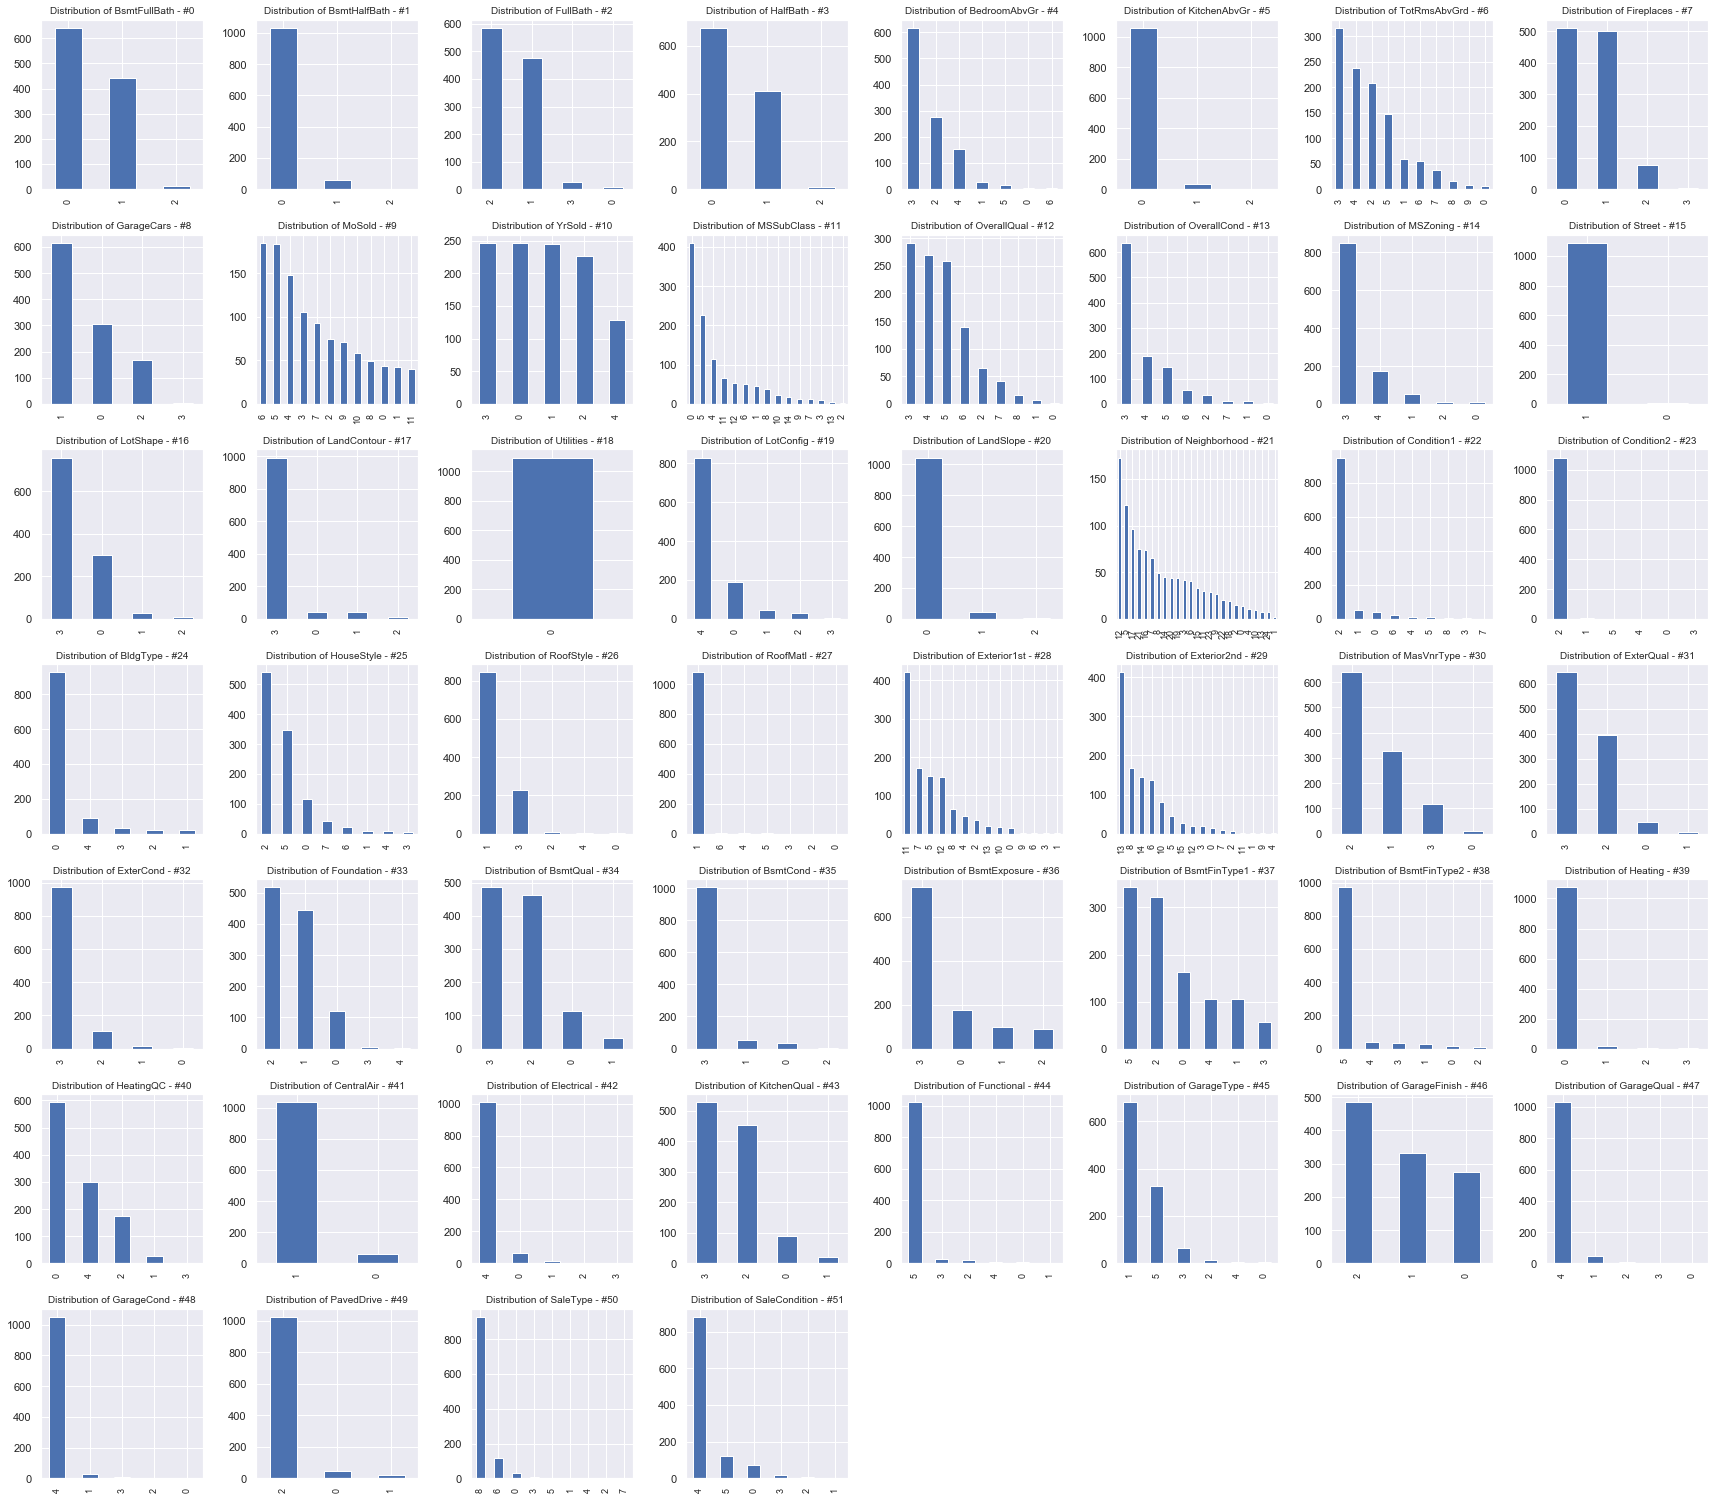

In [16]:
# catogorical data variabels distributions
plt.figure(figsize=(24,21))
for i in range(0,len(cat_col)):
    plt.subplot(7,8,i+1)
    new_df[cat_col[i]].value_counts().plot(kind='bar')
    plt.title("Distribution of {} - #{}".format( cat_col[i], i),fontsize=10)
    plt.xticks(size=9)

plt.tight_layout()



In [17]:
# we can see that some variables have "extrem" outliers or only contain sigle value which means those variables are 
# not really help us to explore more and cannot give us more information
# here I will simply remove those kind of variables
remove_index=[15,23,27,39,51]# remove 7 columns
remove_col=[cat_col[i] for i in remove_index]
remove_col

['Street', 'Condition2', 'RoofMatl', 'Heating', 'SaleCondition']

In [18]:
new_df.drop(columns=remove_col,inplace=True) # drop those columns

In [19]:
# update cat_col
for i in remove_col:
    cat_col.remove(i)
    
print(cat_col)# double check

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'MSSubClass', 'OverallQual', 'OverallCond', 'MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType']


In [20]:
new_df.shape,len(cat_col)

((1094, 71), 47)

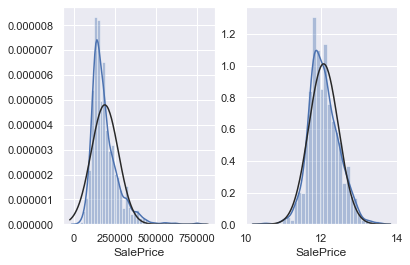

In [21]:
from scipy.stats import norm, skew #for some statistics
plt.subplot(1,2,1)
# distribution of Target
sns.distplot(new_df["SalePrice"],fit=norm)
# Get the fitted parameters used by the function
plt.subplot(1,2,2)
sns.distplot(np.log(new_df["SalePrice"]),fit=norm)


# Feature VS Target

## Numerical Variabels vs Target

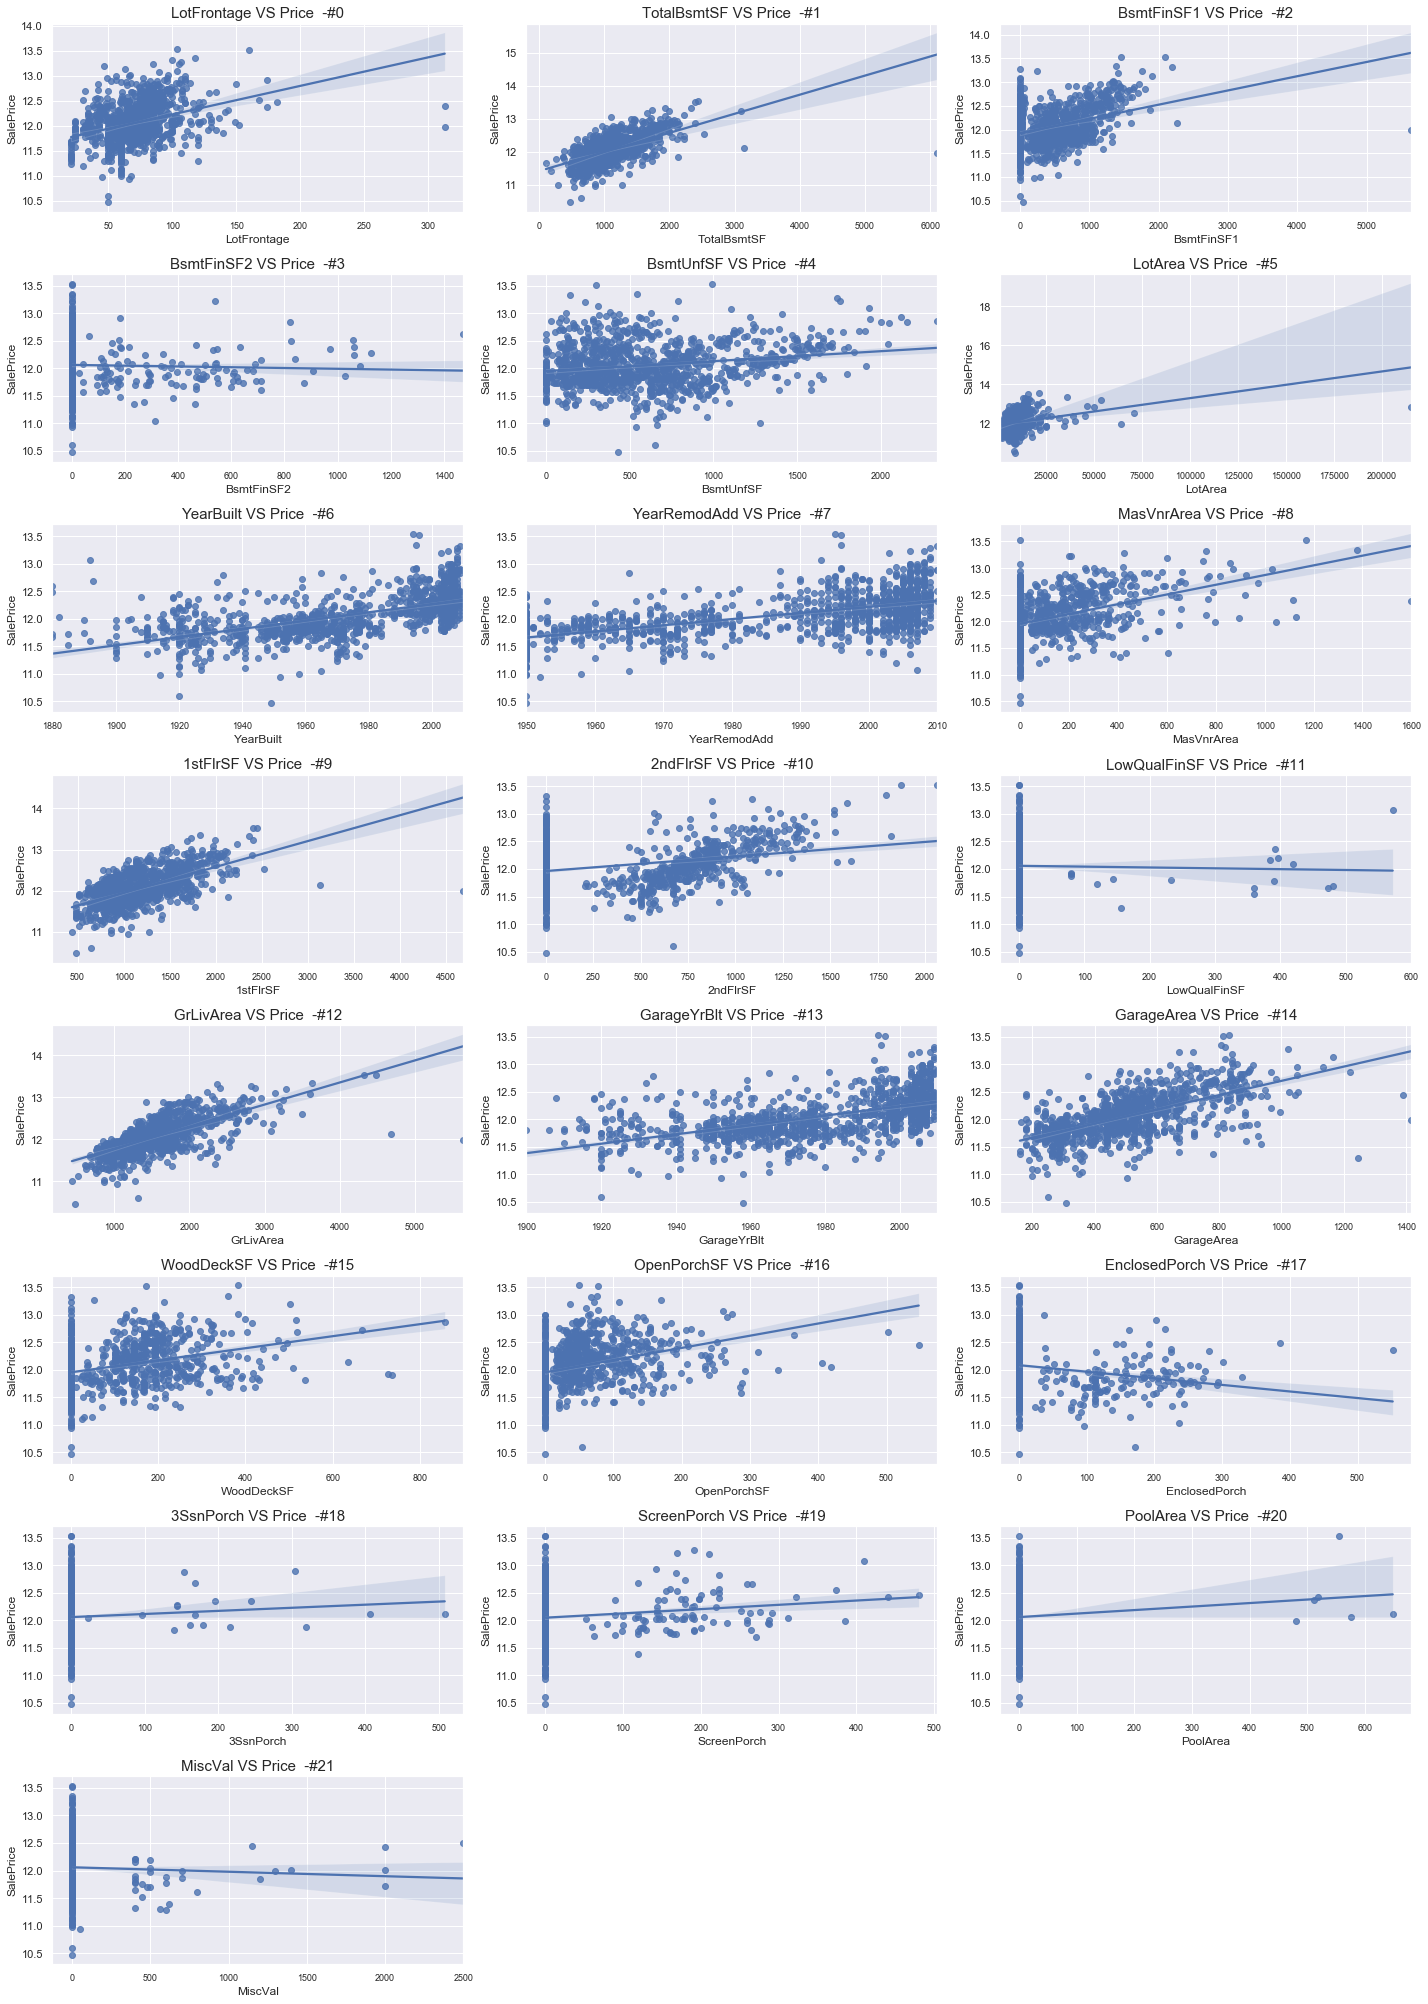

In [22]:
# numerical variabels vs target
plt.figure(figsize=(20,28))
for i in range(0,len(num_col)):
    plt.subplot(8,3,i+1)
    sns.regplot(new_df[num_col[i]],np.log(new_df["SalePrice"]))
    plt.title("{} VS Price  -#{}".format(num_col[i],i),fontsize=15)
    plt.xticks(size=9)
plt.tight_layout()

In [23]:
# Based on the distribution and the scatter plots
# number [3,11,17,18,19,20,21] variables can be removed from num_col 
# those variables either do not have linearity with independent variable or contain significant outliers
remove_indexs=[11,18,20,21]# remove 4 columns
remove_cols=[num_col[i] for i in remove_indexs]
remove_cols

['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']

In [24]:
new_df.drop(columns=remove_cols,inplace=True) # drop those columns

In [25]:
new_df = new_df.drop(new_df[(new_df['GrLivArea']>4000) & (new_df['SalePrice']<300000)].index)

In [26]:
# update cat_col
for i in remove_cols:
    num_col.remove(i)
    
print(num_col)# double check

['LotFrontage', 'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


## Catogorical Variabels Distributions

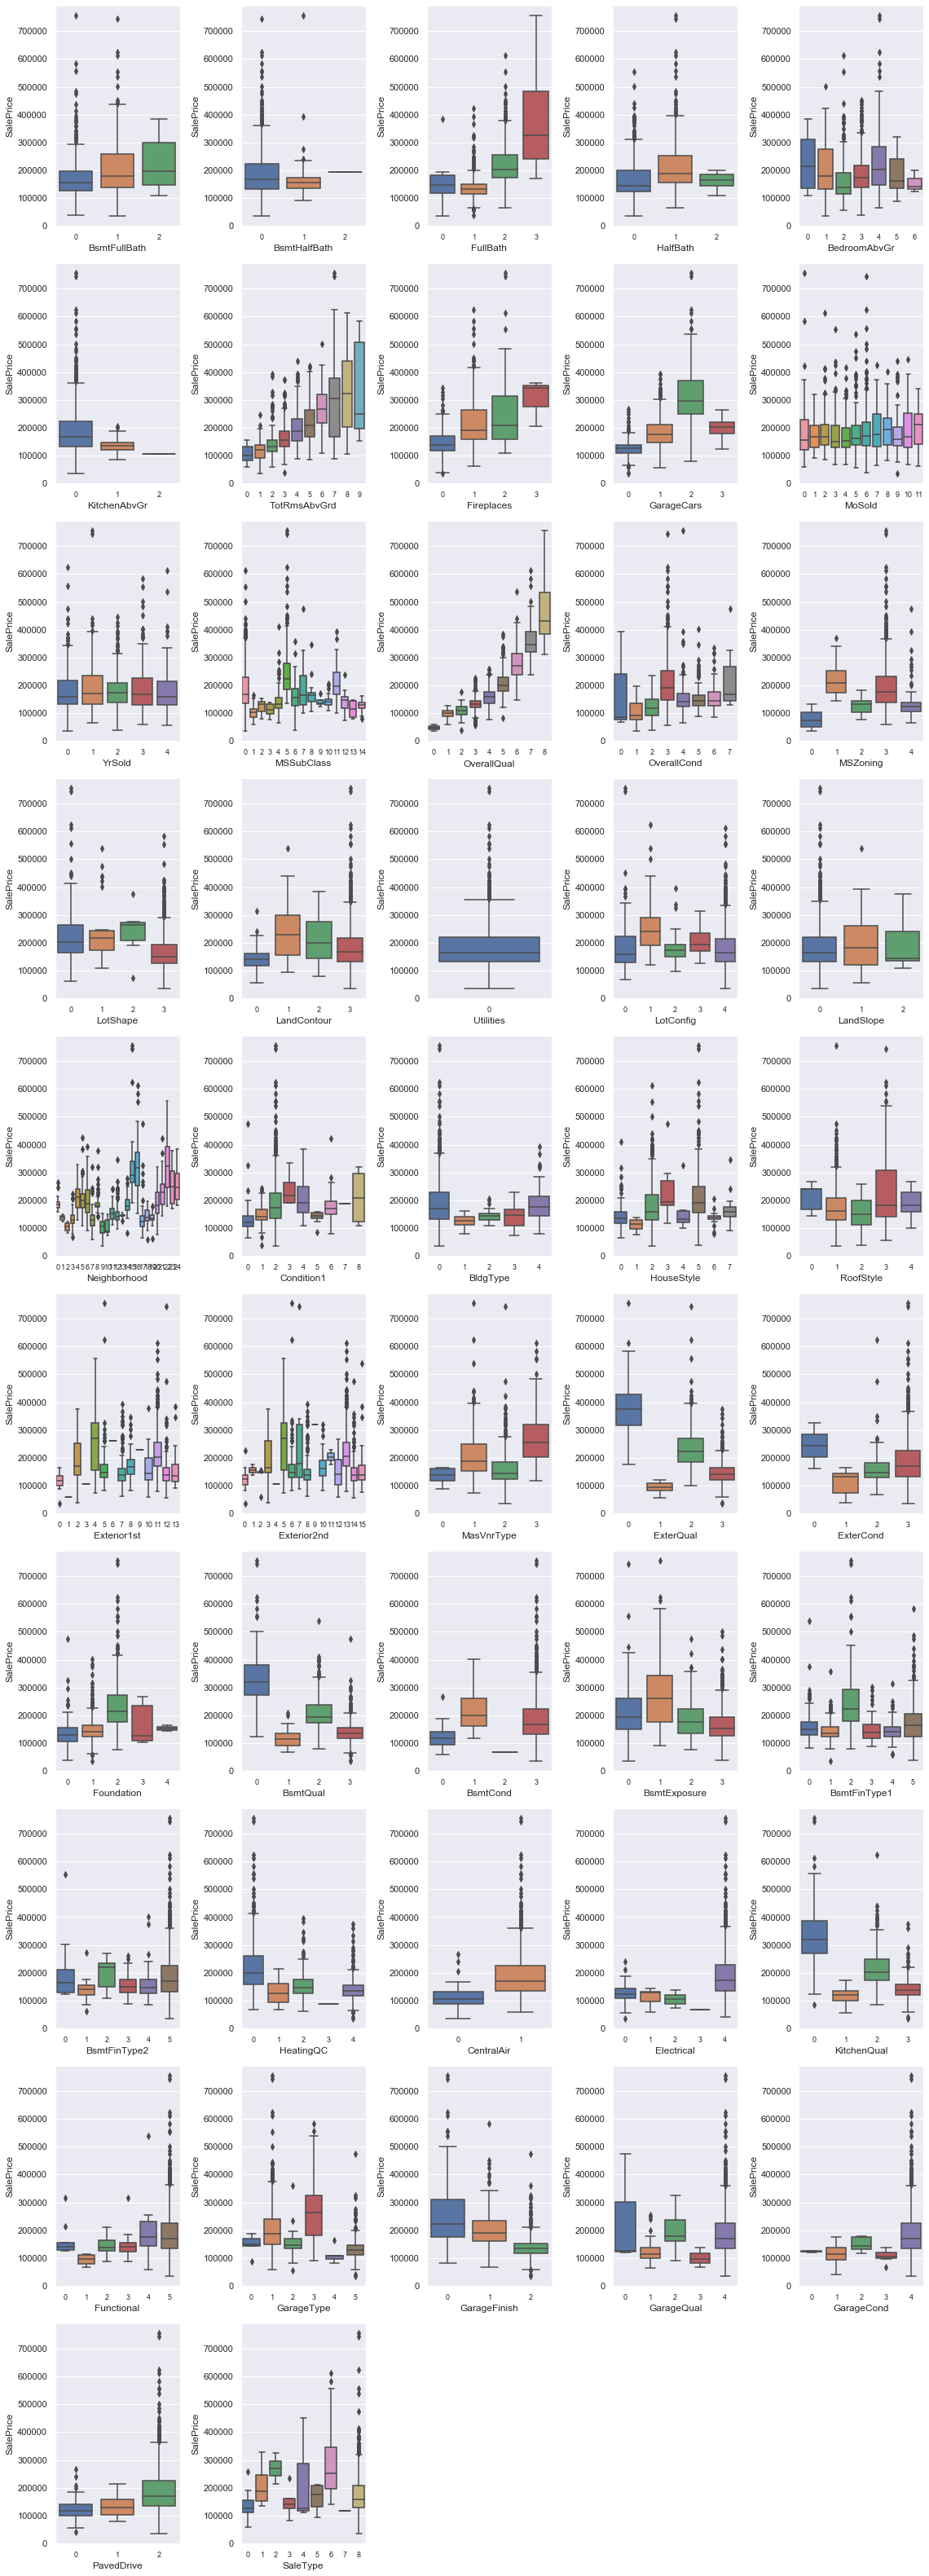

In [27]:
# catogorical variabels distributions
plt.figure(figsize=(16,48))
for i in range(0,len(cat_col)):
    plt.subplot(11,5,i+1)
    sns.boxplot(new_df[cat_col[i]],new_df["SalePrice"])
   # plt.title("Distribution of {}".format( cat_col[i]),fontsize=10)
    plt.xticks(size=9)

plt.tight_layout()

# Scaled data


In [28]:
# Declare inputs and target
inputs=new_df[cat_col+num_col]
target=np.log(new_df.SalePrice)

In [29]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

In [30]:
inputs_scaled=pd.DataFrame(data=inputs_scaled,columns=inputs.columns)
inputs_scaled.head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,...,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,1.130447,-0.241254,0.772815,1.222615,0.180890,-0.182244,0.915787,-0.966473,0.185098,-1.613066,...,0.463286,-0.849612,1.140428,0.361392,0.944842,0.239082,-0.767899,0.230023,-0.358709,-0.282644
1,-0.822794,4.007934,0.772815,-0.776031,0.180890,-0.182244,-0.357338,0.622968,0.185098,-0.497271,...,-0.576019,0.253183,-0.810979,-0.530099,-0.096958,-0.224082,1.663189,-0.730622,-0.358709,-0.282644
2,1.130447,-0.241254,0.772815,1.222615,0.180890,-0.182244,-0.357338,0.622968,0.185098,0.990455,...,0.282998,-0.675773,1.167848,0.512627,0.867672,0.554875,-0.767899,-0.069194,-0.358709,-0.282644
3,1.130447,-0.241254,-1.049893,-0.776031,0.180890,-0.182244,0.279225,0.622968,1.704847,-1.613066,...,-0.576019,-0.564407,0.916496,0.375322,0.751916,0.733825,-0.767899,-0.179432,4.057489,-0.282644
4,1.130447,-0.241254,0.772815,1.222615,1.489048,-0.182244,1.552349,0.622968,1.704847,2.106250,...,1.279883,-0.064618,1.595146,1.332481,0.829087,1.754891,0.798439,0.592233,-0.358709,-0.282644


# Train test split

In [31]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=520)

#check the shape of the results
print("Training set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Testing set - Features: ", x_test.shape, "Target: ",y_test.shape)


Training set - Features:  (873, 65) Target:  (873,)
Testing set - Features:  (219, 65) Target:  (219,)


# Feature Selection

In [32]:
#prepare our data 
feature_columns=inputs.columns
x_train =pd.DataFrame(data=x_train, columns=feature_columns)
x_test =pd.DataFrame(data=x_test, columns=feature_columns)

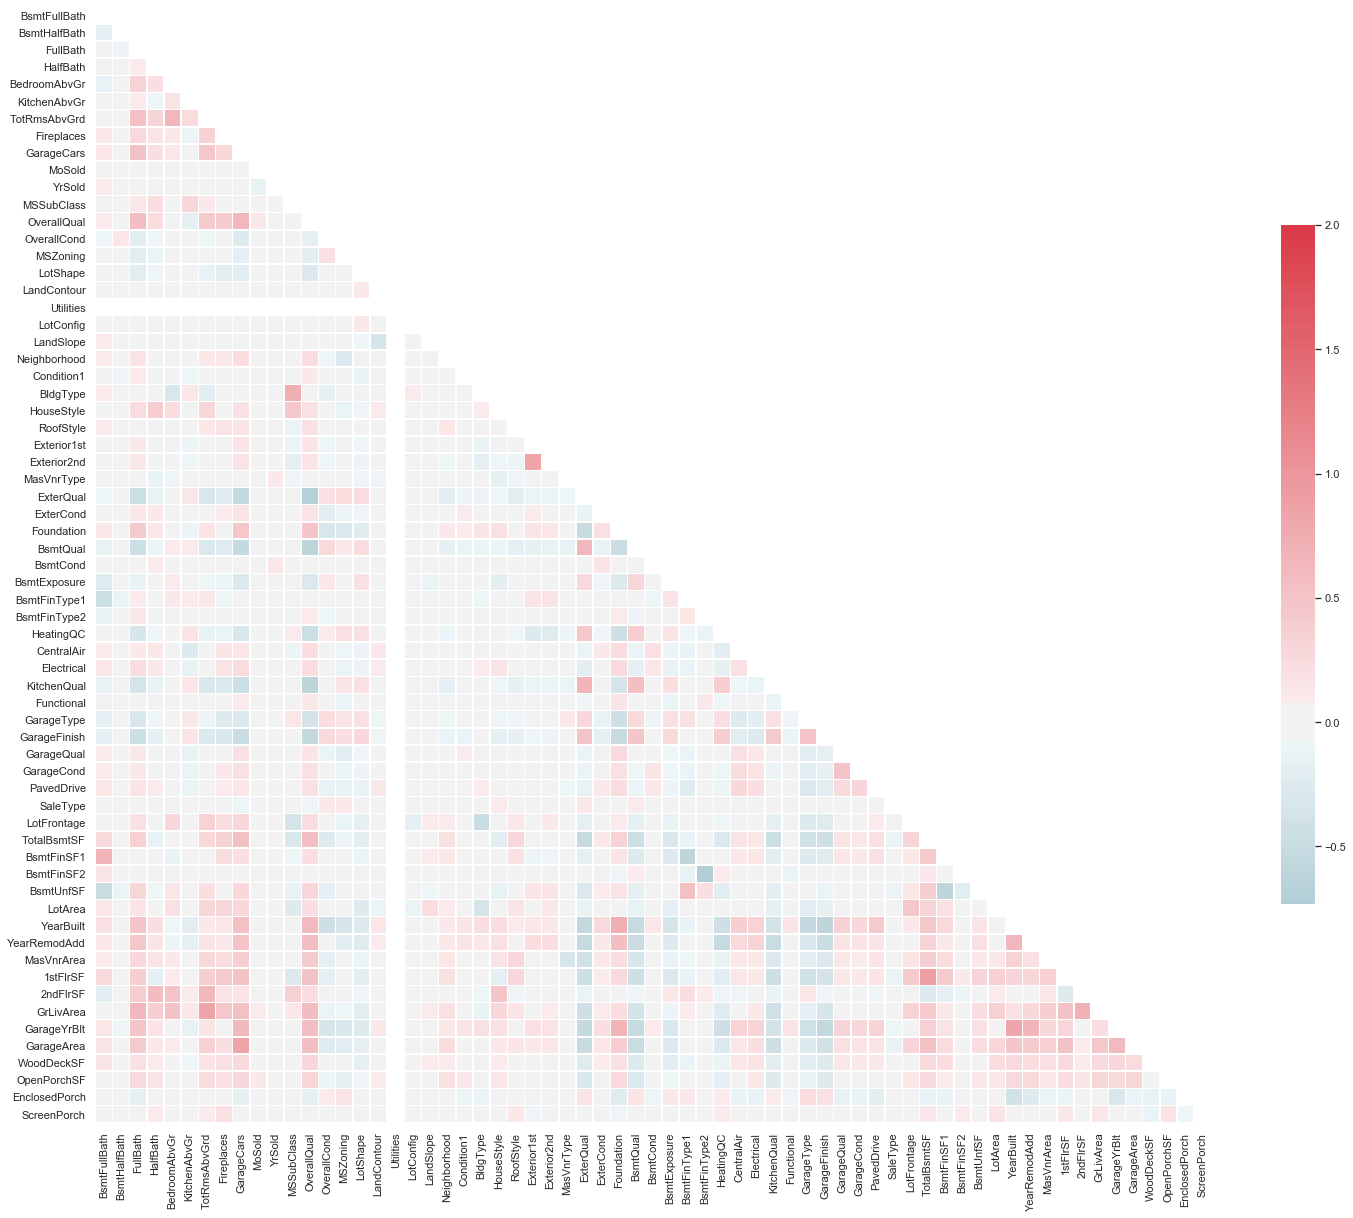

In [33]:
sns.set(style="white")


# Compute the correlation matrix
corr = x_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})
plt.show()

In [35]:
# Create correlation matrix
corr_matrix = x_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
x_train.drop(columns=to_drop, inplace=True)
x_test.drop(columns=to_drop, inplace=True)

len(x_train.columns)

65

In [36]:
len(inputs.columns) # we can see that there are two columns got removed

65

In [48]:
len(x_train.columns)

65

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error


In [52]:
# Number of trees in random forest
n_estimators = list(range(1,100,1))
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = list(range(1,50))
# Minimum number of samples required to split a node
min_samples_split = list(range(1,30))
# Minimum number of samples required at each leaf node
min_samples_leaf = list(range(1,30))
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [53]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(rf,random_grid,cv=20, verbose=1, random_state=365, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)


Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   18.4s finished


RandomizedSearchCV(cv=20, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [54]:
# We can view the best parameters from fitting the random search:
rf_random.best_params_

{'n_estimators': 52,
 'min_samples_split': 26,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 35,
 'bootstrap': False}

In [55]:
# Evaluate Random Search
rf_random.best_score_

0.8609835446076669

In [113]:
# Random Forest model with best parameters
rfr= RandomForestRegressor(n_estimators=rf_random.best_params_["n_estimators"],
                           max_features=rf_random.best_params_["max_features"],
#                             max_depth=rf_random.best_params_["max_depth"], 
#                             min_samples_split=rf_random.best_params_["min_samples_split"],
#                             min_samples_leaf=rf_random.best_params_["min_samples_leaf"],
#                            bootstrap=rf_random.best_params_['bootstrap'],
                           n_jobs=-1, 
                           random_state=365)
rfr.fit(inputs_scaled,target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=52, n_jobs=-1, oob_score=False,
                      random_state=365, verbose=0, warm_start=False)

In [114]:
#Scores for Train data and test data
rf_y_train_pre=rfr.predict(x_train)
print('Accuracy score of train data :{}'.format(rfr.score(x_train,y_train)))
rf_y_test_pre=rfr.predict(x_test)
print('Accuracy score of validation  data :{}'.format(rfr.score(x_test,y_test)))


Accuracy score of train data :0.9836768117642414
Accuracy score of validation  data :0.9822982271419844


In [115]:
#RMSE
def RMSE(actual,prediction):
    rmse=np.sqrt(mean_squared_error(actual, prediction))
    return rmse

In [116]:
print('RMSE - {}'.format(RMSE(y_test,rf_y_test_pre)))

RMSE - 0.05232306884249668


In [1]:
# distribution of residual
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(y_test-rf_y_test_pre,color='g')
plt.title('Distribution of  Residual', fontsize=15)
plt.xlabel('Distribution')

plt.subplot(1,2,2)
plt.scatter(y_test, rf_y_test_pre,color='r',alpha=0.6)
plt.plot(y_test,y_test)
plt.title('Prediction VS Actual Values',fontsize=15)
plt.show()

NameError: name 'plt' is not defined

# Load the test data

In [64]:
# load the data
raw_test_df=pd.read_csv('datasets/test.csv')
raw_test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [65]:
raw_test_df.shape

(1459, 80)

In [66]:
# select the same columns from train data 
test_cols=list(x_train.columns)
test_df=raw_test_df[test_cols]# rename it
test_df.head()# first five rows

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,...,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,0.0,0.0,1,0,2,1,5,0,1.0,6,...,0.0,896,0,896,1961.0,730.0,140,0,0,120
1,0.0,0.0,1,1,3,1,6,0,1.0,6,...,108.0,1329,0,1329,1958.0,312.0,393,36,0,0
2,0.0,0.0,2,1,3,1,6,1,2.0,3,...,0.0,928,701,1629,1997.0,482.0,212,34,0,0
3,0.0,0.0,2,1,3,1,7,1,2.0,6,...,20.0,926,678,1604,1998.0,470.0,360,36,0,0
4,0.0,0.0,2,0,2,1,5,0,2.0,1,...,0.0,1280,0,1280,1992.0,506.0,0,82,0,144


# Data Cleaning

In [67]:
# data cleansing
test_df.isnull().sum()

BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
                ..
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
Length: 65, dtype: int64

In [68]:
# collect the columns that need to be encoded 
encode_col=[]
for col in test_df.columns:
    if type(test_df[col][1])==str:
        encode_col.append(col)
print(encode_col)

['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType']


In [69]:
test_df[encode_col].head()

,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType
0,RH,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,1Fam,1Story,...,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD
1,RL,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,1Fam,1Story,...,Y,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD
2,RL,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,1Fam,2Story,...,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD
3,RL,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,1Fam,2Story,...,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD
4,RL,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,TwnhsE,1Story,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD


In [70]:
# fill out the missing values with mode
for column in encode_col:
    test_df[column].fillna(test_df[column].mode()[0], inplace=True)

/Users/yingyuxuan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [71]:
test_df[encode_col].isnull().sum()# double check the missing values

MSZoning        0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
BldgType        0
HouseStyle      0
RoofStyle       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
HeatingQC       0
CentralAir      0
Electrical      0
KitchenQual     0
Functional      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PavedDrive      0
SaleType        0
dtype: int64

In [72]:
# encode the data
for col in encode_col:
    test_df[col]=encode(test_df[col])

/Users/yingyuxuan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
test_df[encode_col].head()# take a look at the transformed data

,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,...,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType
0,2,3,3,0,4,0,12,1,0,2,...,1,3,3,6,1,2,3,4,2,8
1,3,0,3,0,0,0,12,2,0,2,...,1,3,2,6,1,2,3,4,2,8
2,3,0,3,0,4,0,8,2,0,4,...,1,3,3,6,1,0,3,4,2,8
3,3,0,3,0,4,0,8,2,0,4,...,1,3,2,6,1,0,3,4,2,8
4,3,0,1,0,4,0,22,2,4,2,...,1,3,2,6,1,1,3,4,2,8


In [75]:
# beside catogorical data , we also need to clean numerical data
test_df.drop(columns=encode_col).isnull().sum().reset_index()

,index,0
0,BsmtFullBath,2
1,BsmtHalfBath,2
2,FullBath,0
3,HalfBath,0
4,BedroomAbvGr,0
5,KitchenAbvGr,0
6,TotRmsAbvGrd,0
7,Fireplaces,0
8,GarageCars,1
9,MoSold,0


In [99]:
missing_col=['BsmtFullBath',
             'BsmtHalfBath',
 'GarageCars',
 'LotFrontage',
 'TotalBsmtSF',
 'BsmtFinSF1','BsmtFinSF2',
 'BsmtUnfSF',
 'MasVnrArea',
 'GarageYrBlt',
 'GarageArea']

In [100]:
# fill out the data 
for col in missing_col:
    test_df[col].fillna(test_df[col].median(),inplace=True)

In [101]:
test_df.isnull().sum()# now there is not any  missing values

BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
                ..
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
Length: 65, dtype: int64

In [102]:
# standardization
# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(test_df[x_train.columns])
# Scale the features and store them in a new variable (the actual scaling procedure)
scaled_test_input = scaler.transform(test_df[x_train.columns])

In [117]:
# Now use the model to predict
test_df_prediction=rfr.predict(scaled_test_input)

# Submision

In [118]:
submision=pd.DataFrame()
submision['Id']=raw_test_df['Id']
submision['SalePrice']=np.exp(test_df_prediction)
submision.head()

,Id,SalePrice
0,1461,126528.190913
1,1462,155772.672294
2,1463,183269.990394
3,1464,180257.701060
4,1465,193977.324139


In [119]:
submision.to_csv('submision.csv',index=False)

In [115]:
submision.shape

(1459, 1)